In [97]:
!pip install ultralytics

In [98]:
import pytesseract
import cv2
import os
import numpy as np
from ultralytics import YOLO
from IPython.display import display, Image

#Set the tesseract path in the script before calling "image_to_string"
pytesseract.pytesseract.tesseract_cmd = r'"C:\Program Files\Tesseract-OCR\tesseract.exe"'

In [99]:
!yolo task=detect mode=predict model=best.pt conf=0.25 source= testimages save_crop=True

Ultralytics YOLOv8.0.32  Python-3.9.5 torch-1.11.0+cpu CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\ultralytics\yolo\utils\plotting.py:153: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xyxy = torch.tensor(xyxy).view(-1, 4)
image 1/3 C:\Users\User\CSE498R\LicensePlateDetection\testimages\003.jpg: 480x640 1 license-plate, 761.5ms
image 2/3 C:\Users\User\CSE498R\LicensePlateDetection\testimages\004.jpg: 384x640 2 license-plates, 644.5ms
image 3/3 C:\Users\User\CSE498R\LicensePlateDetection\testimages\73.jpg: 480x640 1 license-plate, 819.9ms
Speed: 2.0ms pre-process, 742.0ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)


In [100]:
import glob
from IPython.display import Image, display

# Retrieve files/pathnames matching the following pattern and display with given width
for image_path in glob.glob(f'runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

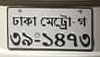

None

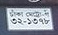

None

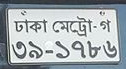

None

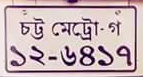

None

In [101]:
for image_path in glob.glob(f'runs/detect/predict/crops/license-plate/*.jpg')[:4]:
     image = display(Image(filename=image_path, width=600))
     display(image)

In [102]:
import cv2
import numpy as np
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
import functools
import matplotlib.pyplot as plt
import easyocr

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[11, 15], [75, 15], [75, 31], [11, 31]], 'ঢাকী শেডরেো', 0.4187757833700227),
 ([[9, 29], [81, 29], [81, 49], [9, 49]], '৩৯-১৪৭', 0.9941141169484513)]

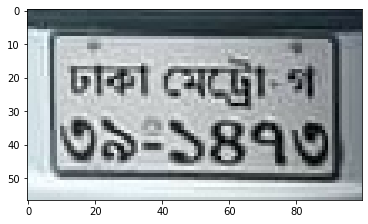

In [103]:
#Load the image and read using EasyOCR
image = cv2.imread('runs/detect/predict/crops/license-plate/003.jpg')
plt.imshow(image)

read_char= easyocr.Reader(['bn'])
detected_1= read_char.readtext(image)
detected_1

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[16, 14], [126, 14], [126, 42], [16, 42]],
  'চট্ট মেট্রো-গ',
  0.5357565310323253),
 ([[6, 42], [134, 42], [134, 70], [6, 70]], '১২-৬৪১৭', 0.9999653510683076)]

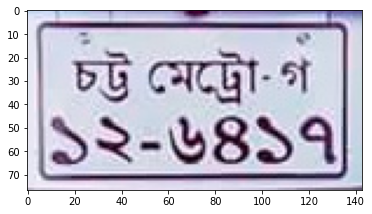

In [104]:
image = cv2.imread('runs/detect/predict/crops/license-plate/73.jpg')
plt.imshow(image)

read_char= easyocr.Reader(['bn'])
detected_2= read_char.readtext(image)
detected_2

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[10, 12], [114, 12], [114, 40], [10, 40]],
  'ঢাকা মেট্রো গ',
  0.660500715992065),
 ([[23, 34], [120, 34], [120, 64], [23, 64]], '৯-১৭৮৬', 0.9745774921684153)]

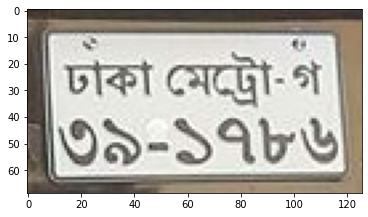

In [105]:
image = cv2.imread('runs/detect/predict/crops/license-plate/0042.jpg')
plt.imshow(image)

read_char= easyocr.Reader(['bn'])
detected_3= read_char.readtext(image)
detected_3

In [106]:
gray = cv2.imread("runs/detect/predict/crops/license-plate/0042.jpg",  0)
gray = cv2.resize( gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
blur = cv2.GaussianBlur(gray, (5,5), 0)
gray = cv2.medianBlur(gray, 3)
# perform otsu thresh (using binary inverse since opencv contours work better with white text)
ret, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
display(thresh)

rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [107]:
dilation = cv2.dilate(thresh, rect_kern, iterations = 1)
display (dilation, 'dilation')

detected_1= read_char.readtext(dilation)
detected_1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

'dilation'

[([[34, 47], [341, 47], [341, 115], [34, 115]],
  'ঢাকা মে্ট্রো:গ',
  0.25932593437901214),
 ([[32, 110], [316, 110], [316, 186], [32, 186]],
  '৩৯-১৭৮',
  0.5757416303837648)]

In [108]:
# Find contours and get bounding box for each contour
result = dilation.copy()
contours = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(result, (x, y), (x+w, y+h), (255, 0, 0), 1)

In [109]:
display(result)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)